## importation

In [263]:
# Imported Libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier    
from sklearn.ensemble import RandomForestClassifier

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import KFold, StratifiedKFold


In [264]:
df = pd.read_csv("D:\\data_p.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,type_de_contrat,ep_inf_30,evol_rev,n,valeur1,b,V1,V2,V3,V4
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,...,11,4,Très Mauvaise,3,Excellent,Très Mauvaise,3.30,3.5,2.5,4
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,...,12,3,Excellent,3,Excellent,Mauvaise,2.35,2.0,2.5,5
2,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,...,1,9,Très Mauvaise,5,Très Mauvaise,Bonne,2.40,5.0,5.0,5
3,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,...,Autres,13,Passable,5,Excellent,Mauvaise,2.00,3.5,2.5,2
4,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,...,6,5,Passable,5,Excellent,Passable,1.00,3.0,2.0,1


In [5]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'term',
       'installment', 'amnt_goods_price', 'emp_title', 'delinq_2yrs',
       'seteur_activité', 'annual_rev', 'valeur', 'charge', 'ratio',
       'ratio_ep', 'type_de_contrat', 'ep_inf_30', 'evol_rev', 'n', 'valeur1',
       'b', 'V1', 'V2', 'V3', 'V4'],
      dtype='object')

In [6]:
df = df.drop( ['person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'term',
       'installment', 'amnt_goods_price', 'emp_title', 'delinq_2yrs', 'ratio'], axis = 1)

In [7]:
df.shape

(21564, 17)

In [8]:
df["loan_status"].value_counts(normalize = True)

0    0.784873
1    0.215127
Name: loan_status, dtype: float64

C:\Users\FrankTIENTCHEU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

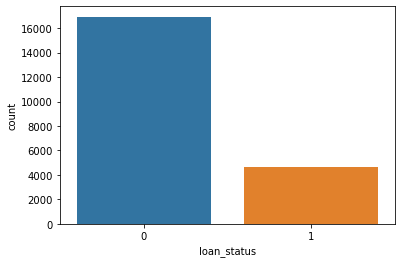

In [9]:
sns.countplot('loan_status', data = df)

<AxesSubplot:>

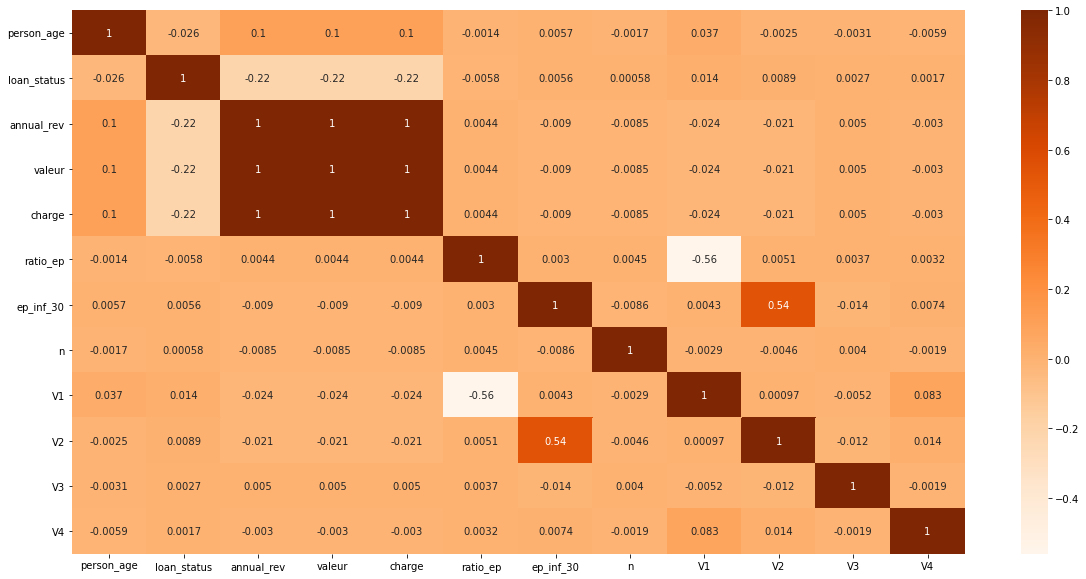

In [10]:
plt.figure(figsize = (20,10))
dfcorr_kendall = df.corr(method="kendall")
sns.heatmap(dfcorr_kendall, annot=True,annot_kws={"size":10},
cmap="Oranges")


In [11]:
# pre processing
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [14]:
evol_r = pd.get_dummies(df['evol_rev'])
Valeur = pd.get_dummies(df['valeur1'])
b = pd.get_dummies(df['b'])
contrat = pd.get_dummies(df['type_de_contrat'])
activité = pd.get_dummies(df['seteur_activité'])
evol_r

,Bonne,Excellent,Mauvaise,Passable,Très Mauvaise
0,0,0,0,0,1
1,0,1,0,0,0
2,0,0,0,0,1
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
21559,1,0,0,0,0
21560,1,0,0,0,0
21561,0,0,1,0,0
21562,0,0,1,0,0


In [23]:
df

,person_age,loan_status,annual_rev,valeur,charge,ratio_ep,ep_inf_30,n,V1,V2,V3,V4
0,22,1,38.3500,11.50500,26.84500,0.10,4,3,3.30,3.5,2.5,4
1,21,0,6.2400,1.87200,4.36800,0.40,3,3,2.35,2.0,2.5,5
2,21,1,6.4350,1.93050,4.50450,0.75,9,5,2.40,5.0,5.0,5
3,26,1,50.1150,15.03450,35.08050,0.40,13,5,2.00,3.5,2.5,2
4,21,1,6.5000,1.95000,4.55000,0.55,5,5,1.00,3.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
21559,52,1,42.2526,12.67578,29.57682,0.30,3,3,2.35,2.0,4.0,2
21560,57,0,34.4500,10.33500,24.11500,0.10,4,5,4.35,2.0,4.0,2
21561,54,0,78.0000,23.40000,54.60000,0.70,13,3,2.05,4.0,3.5,2
21562,65,1,49.4000,14.82000,34.58000,0.55,12,3,1.70,4.0,4.0,2


In [24]:
df.dtypes.value_counts()

float64    7
int64      5
dtype: int64

In [25]:
df.describe(include ='all').transpose()

,count,mean,std,min,25%,50%,75%,max
person_age,21564.0,27.745455,6.357364,20.00,23.000,26.0000,30.00,144.0
loan_status,21564.0,0.215127,0.410920,0.00,0.000,0.0000,0.00,1.0
annual_rev,21564.0,43.350985,43.070640,2.60,25.740,36.3350,52.00,3900.0
valeur,21564.0,13.005296,12.921192,0.78,7.722,10.9005,15.60,1170.0
charge,21564.0,30.345690,30.149448,1.82,18.018,25.4345,36.40,2730.0
ratio_ep,21564.0,0.500601,0.301965,0.00,0.250,0.5000,0.75,1.0
ep_inf_30,21564.0,7.472037,4.624960,0.00,3.000,7.0000,12.00,15.0
n,21564.0,3.663328,0.941644,3.00,3.000,3.0000,5.00,5.0
V1,21564.0,2.222858,0.897158,1.00,1.650,2.0500,2.70,5.0
V2,21564.0,3.001762,0.872738,1.00,2.500,3.0000,3.50,5.0


In [26]:
#informations sur les données
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21564 entries, 0 to 21563
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   person_age   21564 non-null  int64  
 1   loan_status  21564 non-null  int64  
 2   annual_rev   21564 non-null  float64
 3   valeur       21564 non-null  float64
 4   charge       21564 non-null  float64
 5   ratio_ep     21564 non-null  float64
 6   ep_inf_30    21564 non-null  int64  
 7   n            21564 non-null  int64  
 8   V1           21564 non-null  float64
 9   V2           21564 non-null  float64
 10  V3           21564 non-null  float64
 11  V4           21564 non-null  int64  
dtypes: float64(7), int64(5)
memory usage: 2.0 MB
None


In [27]:
df = df.drop(['valeur1','evol_rev','b','type_de_contrat','seteur_activité'], axis =1)
df


KeyError: "['valeur1' 'evol_rev' 'b' 'type_de_contrat' 'seteur_activité'] not found in axis"

In [29]:
df = pd.concat([df, Valeur,evol_r, b,contrat,activité], axis=1)

In [30]:
df

,person_age,loan_status,annual_rev,valeur,charge,ratio_ep,ep_inf_30,n,V1,V2,...,Autres,Aval_Pétrolier,BTP,Banques,Commerce,Courtiers,Industrie,Libéral,Secteur_Public,Transport
0,22,1,38.3500,11.50500,26.84500,0.10,4,3,3.30,3.5,...,0,0,0,0,0,0,0,0,0,0
1,21,0,6.2400,1.87200,4.36800,0.40,3,3,2.35,2.0,...,0,0,0,0,1,0,0,0,0,0
2,21,1,6.4350,1.93050,4.50450,0.75,9,5,2.40,5.0,...,0,0,0,0,0,0,0,1,0,0
3,26,1,50.1150,15.03450,35.08050,0.40,13,5,2.00,3.5,...,0,0,0,0,1,0,0,0,0,0
4,21,1,6.5000,1.95000,4.55000,0.55,5,5,1.00,3.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21559,52,1,42.2526,12.67578,29.57682,0.30,3,3,2.35,2.0,...,0,0,0,0,1,0,0,0,0,0
21560,57,0,34.4500,10.33500,24.11500,0.10,4,5,4.35,2.0,...,0,0,0,0,0,0,0,1,0,0
21561,54,0,78.0000,23.40000,54.60000,0.70,13,3,2.05,4.0,...,0,0,0,0,0,0,0,1,0,0
21562,65,1,49.4000,14.82000,34.58000,0.55,12,3,1.70,4.0,...,0,0,0,0,1,0,0,0,0,0


## determination des valeurs abérrantes

In [31]:
df.describe(include='all')

,person_age,loan_status,annual_rev,valeur,charge,ratio_ep,ep_inf_30,n,V1,V2,...,Autres,Aval_Pétrolier,BTP,Banques,Commerce,Courtiers,Industrie,Libéral,Secteur_Public,Transport
count,21564.000000,21564.000000,21564.000000,21564.000000,21564.000000,21564.000000,21564.000000,21564.000000,21564.000000,21564.000000,...,21564.000000,21564.000000,21564.000000,21564.000000,21564.000000,21564.000000,21564.000000,21564.000000,21564.000000,21564.000000
mean,27.745455,0.215127,43.350985,13.005296,30.345690,0.500601,7.472037,3.663328,2.222858,3.001762,...,0.078881,0.081757,0.083472,0.085049,0.086904,0.084771,0.083472,0.084075,0.084075,0.083983
std,6.357364,0.410920,43.070640,12.921192,30.149448,0.301965,4.624960,0.941644,0.897158,0.872738,...,0.269560,0.274000,0.276601,0.278961,0.281701,0.278547,0.276601,0.277507,0.277507,0.277368
min,20.000000,0.000000,2.600000,0.780000,1.820000,0.000000,0.000000,3.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,25.740000,7.722000,18.018000,0.250000,3.000000,3.000000,1.650000,2.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,36.335000,10.900500,25.434500,0.500000,7.000000,3.000000,2.050000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.000000,0.000000,52.000000,15.600000,36.400000,0.750000,12.000000,5.000000,2.700000,3.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,144.000000,1.000000,3900.000000,1170.000000,2730.000000,1.000000,15.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='loan_status', ylabel='charge'>

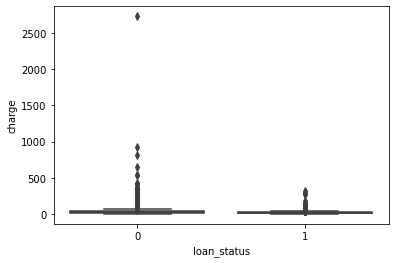

In [34]:
sns.boxplot(x='loan_status', y='charge', data = df)

In [35]:
# fontion de valeurs aberranes
def outliers(data, variable_name):
    iqr = data[variable_name].quantile(0.75)- data[variable_name].quantile(0.25)
    lower = data[variable_name].quantile(0.25) - 1.5* iqr
    upper = data[variable_name].quantile(0.75) + 1.5* iqr
    return data[(data[variable_name]< lower ) | (data[variable_name] > upper)]

In [37]:
outliers(df, 'charge').sort_values('charge')

,person_age,loan_status,annual_rev,valeur,charge,ratio_ep,ep_inf_30,n,V1,V2,...,Autres,Aval_Pétrolier,BTP,Banques,Commerce,Courtiers,Industrie,Libéral,Secteur_Public,Transport
13631,32,0,91.58500,27.475500,64.109500,0.00,3,3,3.95,2.0,...,0,0,0,0,0,0,0,0,0,0
19252,27,0,91.64155,27.492465,64.149085,0.90,7,3,1.70,3.0,...,0,0,0,0,0,0,0,0,0,1
18194,29,0,91.65000,27.495000,64.155000,0.55,14,3,2.40,3.5,...,0,0,0,0,0,0,0,1,0,0
18195,28,0,91.65000,27.495000,64.155000,0.20,13,5,3.35,3.5,...,1,0,0,0,0,0,0,0,0,0
10299,24,0,91.65000,27.495000,64.155000,0.30,12,5,2.00,3.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19282,36,0,780.00000,234.000000,546.000000,0.95,10,5,2.05,3.0,...,0,0,0,0,0,0,0,0,0,1
21142,44,0,936.00000,280.800000,655.200000,0.30,13,3,1.65,3.0,...,0,0,0,1,0,0,0,0,0,0
21510,63,0,1158.30000,347.490000,810.810000,0.40,12,5,2.35,4.0,...,0,1,0,0,0,0,0,0,0,0
19877,42,0,1325.85960,397.757880,928.101720,0.35,3,5,2.00,3.5,...,0,0,0,0,0,0,0,0,0,0


In [38]:
iqr_loan = df['charge'].quantile(0.75)- df['charge'].quantile(0.25)
df['charge'].quantile(0.75) + 1.5*iqr_loan

63.973

In [39]:
df.loc[(outliers(df, 'charge').index, 'charge')]= df['charge'].quantile(0.75) + 1.5*iqr_loan

<AxesSubplot:ylabel='charge'>

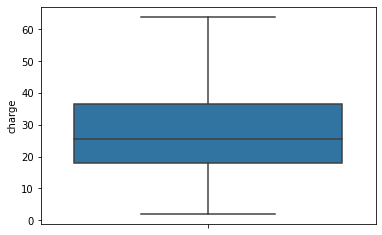

In [40]:
sns.boxplot(y = 'charge', data = df)

In [41]:
df.describe()

,person_age,loan_status,annual_rev,valeur,charge,ratio_ep,ep_inf_30,n,V1,V2,...,Autres,Aval_Pétrolier,BTP,Banques,Commerce,Courtiers,Industrie,Libéral,Secteur_Public,Transport
count,21564.000000,21564.000000,21564.000000,21564.000000,21564.000000,21564.000000,21564.000000,21564.000000,21564.000000,21564.000000,...,21564.000000,21564.000000,21564.000000,21564.000000,21564.000000,21564.000000,21564.000000,21564.000000,21564.000000,21564.000000
mean,27.745455,0.215127,43.350985,13.005296,28.636701,0.500601,7.472037,3.663328,2.222858,3.001762,...,0.078881,0.081757,0.083472,0.085049,0.086904,0.084771,0.083472,0.084075,0.084075,0.083983
std,6.357364,0.410920,43.070640,12.921192,14.386537,0.301965,4.624960,0.941644,0.897158,0.872738,...,0.269560,0.274000,0.276601,0.278961,0.281701,0.278547,0.276601,0.277507,0.277507,0.277368
min,20.000000,0.000000,2.600000,0.780000,1.820000,0.000000,0.000000,3.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,25.740000,7.722000,18.018000,0.250000,3.000000,3.000000,1.650000,2.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,36.335000,10.900500,25.434500,0.500000,7.000000,3.000000,2.050000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.000000,0.000000,52.000000,15.600000,36.400000,0.750000,12.000000,5.000000,2.700000,3.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,144.000000,1.000000,3900.000000,1170.000000,63.973000,1.000000,15.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Split train_test

In [55]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [56]:
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [57]:
X_train

,person_age,annual_rev,valeur,charge,ratio_ep,ep_inf_30,n,V1,V2,V3,...,Autres,Aval_Pétrolier,BTP,Banques,Commerce,Courtiers,Industrie,Libéral,Secteur_Public,Transport
18275,35,97.5000,29.25000,63.97300,0.65,6,3,1.00,2.5,4.5,...,0,0,0,0,0,0,0,0,0,0
10443,26,96.2000,28.86000,63.97300,0.95,15,5,1.35,3.5,5.0,...,0,0,0,0,0,1,0,0,0,0
5127,22,26.0000,7.80000,18.20000,0.00,10,3,5.00,3.0,2.5,...,0,0,1,0,0,0,0,0,0,0
1603,22,20.8728,6.26184,14.61096,0.80,15,5,1.35,4.5,4.0,...,0,1,0,0,0,0,0,0,0,0
18248,33,76.2450,22.87350,53.37150,0.50,3,3,2.35,2.0,2.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,30,23.4000,7.02000,16.38000,0.45,12,5,1.65,4.0,5.0,...,0,0,0,0,0,0,0,0,0,0
19648,39,19.8250,5.94750,13.87750,0.35,3,3,2.00,2.5,2.5,...,0,0,0,0,0,1,0,0,0,0
9845,24,17.1600,5.14800,12.01200,0.55,11,3,1.00,3.0,4.0,...,0,0,0,0,0,0,0,0,1,0
10799,25,20.8000,6.24000,14.56000,0.90,5,5,1.00,3.0,2.5,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# Voir si la distribution des étiquettes de formation et de test est distribuée de manière similaire.
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train))
print(test_counts_label/ len(y_test))

----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.78859828 0.21140172]
[0.7736969 0.2263031]


In [46]:
y_train.shape

(16173,)

## Standardisation

In [47]:
from sklearn.preprocessing import StandardScaler, RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
X

,person_age,annual_rev,valeur,charge,ratio_ep,ep_inf_30,n,V1,V2,V3,...,Autres,Aval_Pétrolier,BTP,Banques,Commerce,Courtiers,Industrie,Libéral,Secteur_Public,Transport
0,22,38.3500,11.50500,26.84500,0.10,4,3,3.30,3.5,2.5,...,0,0,0,0,0,0,0,0,0,0
1,21,6.2400,1.87200,4.36800,0.40,3,3,2.35,2.0,2.5,...,0,0,0,0,1,0,0,0,0,0
2,21,6.4350,1.93050,4.50450,0.75,9,5,2.40,5.0,5.0,...,0,0,0,0,0,0,0,1,0,0
3,26,50.1150,15.03450,35.08050,0.40,13,5,2.00,3.5,2.5,...,0,0,0,0,1,0,0,0,0,0
4,21,6.5000,1.95000,4.55000,0.55,5,5,1.00,3.0,2.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21559,52,42.2526,12.67578,29.57682,0.30,3,3,2.35,2.0,4.0,...,0,0,0,0,1,0,0,0,0,0
21560,57,34.4500,10.33500,24.11500,0.10,4,5,4.35,2.0,4.0,...,0,0,0,0,0,0,0,1,0,0
21561,54,78.0000,23.40000,54.60000,0.70,13,3,2.05,4.0,3.5,...,0,0,0,0,0,0,0,1,0,0
21562,65,49.4000,14.82000,34.58000,0.55,12,3,1.70,4.0,4.0,...,0,0,0,0,1,0,0,0,0,0


In [49]:
X_train

array([[ 1.28571429,  2.33940594,  2.33940594, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  2.28990099,  2.28990099, ...,  0.        ,
         0.        ,  0.        ],
       [-0.57142857, -0.38336634, -0.38336634, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.28571429, -0.72      , -0.72      , ...,  0.        ,
         1.        ,  0.        ],
       [-0.14285714, -0.58138614, -0.58138614, ...,  0.        ,
         0.        ,  0.        ],
       [-0.57142857, -0.38336634, -0.38336634, ...,  0.        ,
         0.        ,  0.        ]])

###  stat model

In [58]:
#importation de la librairie de calcul
import statsmodels as sm
#vérification de version
print(sm.__version__)


0.12.2


In [59]:
from statsmodels.tools import add_constant 
X_constant = sm.tools.add_constant(X_train)
X_test = sm.tools.add_constant(X_test)

In [60]:
from statsmodels.api import Logit
lr = Logit(endog=y_train,exog=X_constant)


In [61]:
res = lr.fit(maxiter=1000)
res

Optimization terminated successfully.
         Current function value: 0.480714
         Iterations 40


In [62]:
print(res.summary())

                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                16173
Model:                          Logit   Df Residuals:                    16123
Method:                           MLE   Df Model:                           49
Date:                Fri, 15 Oct 2021   Pseudo R-squ.:                 0.06804
Time:                        17:25:58   Log-Likelihood:                -7774.6
converged:                       True   LL-Null:                       -8342.2
Covariance Type:            nonrobust   LLR p-value:                1.384e-205
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.4902        nan        nan        nan         nan         nan
person_age         -0.0018      0.003     -0.555      0.579      -0.008       0.005
annual_rev          0.0008      

In [63]:
model = sm.Logit(y_train,X_constant).fit()

AttributeError: module 'statsmodels' has no attribute 'Logit'

In [ ]:
X_train

In [80]:
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

In [81]:
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=42)],
                                ['classifier', LogisticRegression(random_state=42, max_iter=1000)]])

stratified_kfold = StratifiedKFold(n_splits=3,shuffle=True,random_state=11)
    
param_grid = {'classifier__C':np.linspace(0.1,1,99)}
grid_search = GridSearchCV(estimator=pipeline,param_grid=param_grid,scoring='accuracy', cv=stratified_kfold,  n_jobs=-1)

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Cross-validation score: 0.7699251839485562
Test score: 0.7790762381747357


In [82]:
grid_search.best_params_

{'classifier__C': 0.403061224489796}

In [83]:
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=42)],
                                ['classifier', LogisticRegression(dual= False,
                                                                  fit_intercept= True,
                                                                  max_iter= 1000,
                                                                  n_jobs= -5,
                                                                  penalty= 'l2',
                                                                  tol=0.0001,
                                                                  warm_start= False)]])

stratified_kfold = StratifiedKFold(n_splits=3,shuffle=True,random_state=11)
    
param_grid = {'classifier__C':np.linspace(0.1,1,99)}
grid_search = GridSearchCV(estimator=pipeline,param_grid=param_grid,scoring='accuracy', cv=stratified_kfold,  n_jobs=-1)

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Cross-validation score: 0.7699251839485562
Test score: 0.7790762381747357


In [84]:
grid_search.best_params_

{'classifier__C': 0.403061224489796}

In [85]:
model = grid_search.best_estimator_


In [ ]:
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=42)],
                                ['classifier', LogisticRegression(random_state=42, max_iter=1000)]])

stratified_kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=11)
    
param_grid = {"dual":[False,True],
              "fit_intercept":[False,True],
              "max_iter":[1,10,100,1000],
              "penalty":("l1","l2"),
              "tol":[0.0001,0.001,0.01,1.0],
              "warm_start":[False,True],
              'classifier__C':range(1,100,1)}
grid_search = GridSearchCV(estimator=pipeline,param_grid=param_grid,scoring='accuracy', cv=stratified_kfold,  n_jobs=-1)

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

In [ ]:
grid_search.get_params().keys()

In [86]:
classifier = {"LogisiticRegression": LogisticRegression(dual= False,
                                                                  fit_intercept= True,
                                                                  max_iter= 1000,
                                                                  n_jobs= -5,
                                                                  penalty= 'l2',
                                                                  tol=0.0001,
                                                                  warm_start= False)}


In [153]:
print(pd.DataFrame({"var":X_train.columns,"coef":classifier.coef_[0]}))

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [87]:
# cross validation.
from sklearn.model_selection import cross_val_score

for key, classifier in classifier.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 85.0 % accuracy score


## Performance du modèle avec Grid_search

In [88]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)

print(round(accuracy_score(y_test,pred),2))
print("\n")
print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))

0.78


[[3267  904]
 [ 287  933]]


              precision    recall  f1-score   support

           0       0.92      0.78      0.85      4171
           1       0.51      0.76      0.61      1220

    accuracy                           0.78      5391
   macro avg       0.71      0.77      0.73      5391
weighted avg       0.83      0.78      0.79      5391



### Cross-validation simple sans oversamplind

In [91]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)

print(round(accuracy_score(y_test,y_pred),2))
print("\n")
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

0.84


[[3987  184]
 [ 655  565]]


              precision    recall  f1-score   support

           0       0.86      0.96      0.90      4171
           1       0.75      0.46      0.57      1220

    accuracy                           0.84      5391
   macro avg       0.81      0.71      0.74      5391
weighted avg       0.84      0.84      0.83      5391



In [426]:
#Predicting probaii
y_pred_prob = model.predict_proba(X_test)[:,1]

In [427]:
(list(y_pred_prob))

[0.05309921409954956,
 0.05972110166374736,
 0.12445996851391278,
 0.06597044501184127,
 0.11151077755645242,
 0.16908300469546042,
 0.377357467443881,
 0.5100108952115199,
 0.6084876052067932,
 0.2589589011596843,
 0.12713245285534505,
 0.8069694506470736,
 0.5578210476276606,
 0.4682342615918292,
 0.29040999137059875,
 0.8542190283159621,
 0.9946825217851331,
 0.838141333405854,
 0.6291799126390931,
 0.7951238607951099,
 0.1469091071889963,
 0.42439353993600254,
 0.41343880930212,
 0.2936641950066828,
 0.16112212261304457,
 0.15355795557087543,
 0.775865580816876,
 0.3758284171044201,
 0.2805449797212417,
 0.5199243510296228,
 0.74351257705732,
 0.9214726793611439,
 0.11898425393187233,
 0.3389276849888062,
 0.643259780835387,
 0.21390363377484226,
 0.27134493635294804,
 0.17697065327378947,
 0.5469167497361225,
 0.03582405512101964,
 0.038098835602874366,
 0.9472565591935787,
 0.9640338407965549,
 0.05807157511063272,
 0.815771453335596,
 0.5521746452725264,
 0.06202656526571871,
 0

In [428]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_test, y_pred_prob ))

Logistic Regression:  0.8506040930546985


In [436]:
cv_proc = classifier.predict_proba(X_test)[:,1]

In [437]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_test, cv_proc))

Logistic Regression:  0.8528259135089671


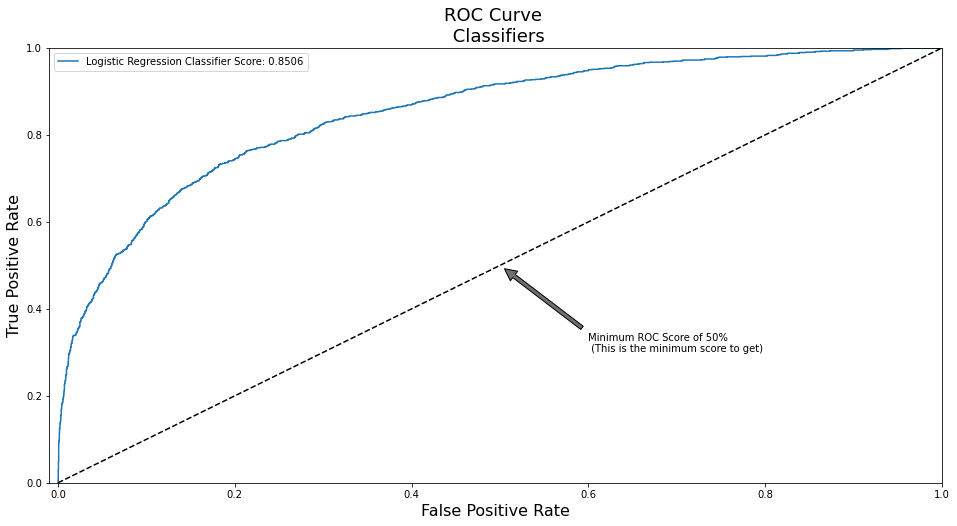

In [429]:
from sklearn.metrics import roc_curve
# courbe ROC
log_fpr, log_tpr, log_thresold = roc_curve(y_test,  y_pred_prob)
def graph_roc_curve_multiple(log_fpr, log_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_prob)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr)
plt.show()

In [61]:
Prob = pd.DataFrame(y_pred_prob)

In [60]:
Prob

,0
0,0.102462
1,0.178068
2,0.030928
3,0.474388
4,0.272415
...,...
5386,0.029483
5387,0.371598
5388,0.185511
5389,0.279924


In [62]:
data = pd.DataFrame(original_Xtest)

In [63]:
data.shape

(5391, 71)

In [64]:
Prob

,0
0,0.102462
1,0.178068
2,0.030928
3,0.474388
4,0.272415
...,...
5386,0.029483
5387,0.371598
5388,0.185511
5389,0.279924


In [314]:
Final_data = pd.concat([data,Prob], axis = 1)

In [315]:
Final_data

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,0
0,-0.2,-0.718133,-0.357143,0.0,0.255102,0.0,1.710396,0.0,0.000000e+00,0.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.056039
1,-0.2,-0.784560,0.857143,-0.2,-0.357143,0.0,-0.022277,0.0,0.000000e+00,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.157527
2,-0.4,-0.933573,-0.357143,-0.2,0.520408,0.0,0.646040,0.0,0.000000e+00,-0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.040346
3,0.0,0.423698,0.500000,-0.4,-0.612245,2.0,-1.160891,2.0,0.000000e+00,0.3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.489017
4,0.2,0.089767,0.000000,2.4,-0.510204,0.0,0.299505,0.0,-2.220446e-16,0.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.214684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5386,-0.4,-0.784560,-0.500000,0.2,0.510204,0.0,0.349010,0.0,0.000000e+00,0.7,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.019718
5387,0.2,-0.312388,0.571429,2.6,1.530612,0.0,0.373861,0.0,-2.220446e-16,-0.8,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.459074
5388,0.6,-0.554758,0.000000,-0.2,-0.448980,1.0,-0.641089,1.0,0.000000e+00,-0.8,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.177341
5389,0.0,0.150808,-0.357143,-0.4,0.040816,0.0,0.472772,0.0,0.000000e+00,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.350994


In [ ]:
#la règle d'affectation consiste à confronter le LOGIT à la valeur seuil 0 
predResub = numpy.where(res.fittedvalues > 0, 1, 0) 
print(predResub) 

In [66]:
# importation de l'outil 
from statsmodels.tools import add_constant 
 
#données X avec la constante 
XTrainBis = sm.tools.add_constant(XTrain) 
 
#vérifier la structure 
print(XTrainBis.info()) 

NameError: name 'sm' is not defined

In [ ]:
#visualisation des premières lignes de la structure premières lignes 
print(XTrainBis.head()) 

In [ ]:
#importation de la classe de calcul 
from statsmodels.api import Logit 
 
#régression logistique - on passe la cible et les explicatives 
lr = Logit(endog=yTrain,exog=XTrainBis) 
 
#lancer les calculs
res = lr.fit() 

In [ ]:
#résumé des résultats 
print(res.summary())

In [ ]:
"Evaluation globale"
#valeurs estimées par la régression en resubstitution 
#(matrice de confusion)correspondant au valeur logit
print(res.fittedvalues)

#Voici les coefficients estimés 
print(res.params)

In [ ]:
#voici la description du premier individu 
print(XTrainBis.iloc[0,:]) 

In [ ]:
#et si on fait le produit scalaire – valeur du LOGIT pour l’individu n°0 
import numpy 
print(numpy.sum(res.params*XTrainBis.iloc[0,:]))

In [ ]:
#la règle d'affectation consiste à confronter le LOGIT à la valeur seuil 0 
predResub = numpy.where(res.fittedvalues > 0, 1, 0) 
print(predResub) 

In [ ]:
#on peut en déduire la matrice de confusion 
print(pandas.crosstab(yTrain,predResub))

In [ ]:

# R^2 pseudo
#accès à la log-vraisemblance du modèle 
print("Log-vraisemblance du modèle : %.4f" % (res.llf)) 
 
#log-vraisemblance du null modèle 
print("Log-vraisemblance du null modèle : %.4f" % (res.llnull))

In [ ]:
#R2 de McFadden 
R2MF = 1 - res.llf / res.llnull 
print(R2MF) 
#qui est founi directement par l'outil 
print(res.prsquared)

In [ ]:
# R² de Cox et Snell.
#exponenielle de LL_null 
L0 = numpy.exp(res.llnull) 
 
#exponentielle de LL_modèle 
La = numpy.exp(res.llf) 
 
#taille de l'échantillon 
n = DTrain.shape[0] 
 
#R2 de Cox et Snell 
R2CS = 1.0 - (L0 / La)**(2.0/n) 
print("R2 de Cox - Snell : %.4f" % (R2CS)) 

In [ ]:
# R² de Nagelkerke.
#max du R2 de COx-Snell 
maxR2CS = 1.0 - (L0)**(2.0/n) 
 
#R2 de Nagelkerke 
R2N = R2CS / maxR2CS 
print("R2 de Nagelkerke : %.4f" % (R2N))

In [ ]:
" Test de significativité des coéfficients"(tester la nullité de out ou partie des coef de regression)

In [ ]:
'test du rapport de vraisemblance'
#déviance du modèle 
dev_modele = (-2) * res.llf 
print("Deviance du modèle : %.4f " % (dev_modele)) 
 
#déviance du modèle trivial 
dev_null = (-2) * res.llnull 
print("Deviance du modèle : %.4f " % (dev_null)) 
 
#statistique du rapport de vraisemblance 
LR_stat = dev_null - dev_modele 
print("Stat. du rapport de vraisemblance : %.4f " % (LR_stat)) 
#laquelle était fournie directement par l'objet 
print("Stat. du rapport de vraisemblance via l'objet résultat : %.4f" % (res.llr))

In [ ]:
#degré de liberté du test (nb. de coef. estimés excepté la constante) 
print(res.df_model)

In [ ]:
#p-value du test 
pvalue = 1.0 - scipy.stats.chi2.cdf(res.llr,res.df_model) 
print(pvalue) 

In [ ]:
#laquelle était également fournie par l'objet 
print(res.llr_pvalue)

In [ ]:
#AIC du modèle 
print("AIC du modèle : %.4f" % (res.aic)) 
 
#AIC du modèle trivial - 1 seul param. estimé, la constante 
aic_null = (-2) * res.llnull + 2 * (1) 
print("AIC du modèle trivial : %.4f" % (aic_null))

In [ ]:
#BIC du modèle 
print("BIC du modèle : %.4f" % (res.bic)) 
 
#BIC du modèle trivial - 1 seul param. estimé, la constante 
bic_null = (-2) * res.llnull + numpy.log(n) * (1) 
print("BIC du modèle trivial : %.4f" % (bic_null)) 

In [ ]:
#convertir en prédiction brute 
predSm = numpy.where(predProbaSm > 0.5, 1, 0) 
print(numpy.unique(predSm,return_counts=True)) 

In [ ]:
# sur Scity
#affichage des coefficients 
print(pandas.DataFrame({"var":XTrain.columns,"coef":lrSk.coef_[0]})) 

In [ ]:
#la constante 
print(lrSk.intercept_) 

In [ ]:
#transformation 
ZTrain = stds.fit_transform(XTrain) 
print(scipy.stats.describe(ZTrain,axis=0,ddof=0))

In [159]:
#correction des coefficients - dé-standardisation 
#par les écarts-type utilisés lors de la standardisation des variables 
coefUnstd = lrSkStd.coef_[0] / stds.scale_ 

NameError: name 'lrSkStd' is not defined

In [ ]:
#pour la constante, l'opération est plus complexe 
interceptUnStd = lrSkStd.intercept_ + numpy.sum(lrSkStd.coef_[0]*(-stds.mean_/stds.scale_)) 
print(interceptUnStd)

In [ ]:
#log-vraisemblance 
log_likelihood = numpy.sum(yTrain*numpy.log(proba1)+(1.0-yTrain)*numpy.log(1.0-proba1)) 
print(log_likelihood)

In [ ]:
def create( df,colname):
    col_dummies = pd.get_dummies([df[colname], prefix = colname], axis =1)
    col_dummies.drop([col_dummies.columns[0], axis =1, inplace = True])
    df = df.concat([df, col_dummies], axis=1, inplace = True)
    df.drop([])

# Hyper-paramètre

In [75]:
logreg = LogisticRegression(dual= False,
fit_intercept= True,
max_iter= 10000,
n_jobs= -1,
penalty= 'l2',
tol=0.0001,
warm_start= False)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=10000, n_jobs=-1)

In [301]:
from sklearn.model_selection import GridSearchCV
param_grid = {"dual":[False,True],
              "fit_intercept":[False,True],
              "max_iter":[1,10,100,1000],
              "penalty":("l1","l2"),
              "tol":[0.0001,0.001,0.01,1.0],
              "warm_start":[False,True]}
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid)
grid_model.fit(X_train,y_train)
print("Best score: ", grid_model.best_score_, "Best parameters: ", grid_model.best_params_)

NameError: name 'logreg' is not defined

In [ ]:
# Features selection

In [154]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif


In [155]:
chi2(X, y)

(array([5.98042746e+02, 2.30929710e+03, 2.05406660e+02, 1.77592979e+01,
        3.19698285e+00, 4.88515285e+04, 1.14206050e-01, 1.62813911e+04,
        4.88441732e+03, 1.13969737e+04, 1.47518404e-25, 1.89518645e-01,
        2.74389443e+00, 1.74357932e-03, 2.46562398e+00, 6.42908091e-01,
        1.74541836e-02, 1.17969135e-01, 4.34357512e+02, 1.85947814e+00,
        2.23558800e+02, 5.96657395e+02, 5.84824516e-02, 1.48407245e-02,
        7.38143050e-01, 2.41855173e-01, 2.86607282e-02, 3.86488906e-01,
        1.32839751e-01, 1.27939548e-02, 8.60051850e-01, 9.12838483e-01,
        1.15767809e-02, 1.62118636e+00, 1.09522682e+00, 3.99283803e-01,
        9.87244243e+01, 6.19299785e+01, 2.98300453e+01, 6.44437555e+01,
        9.37655076e+00, 1.13051055e+02, 6.93313762e-02, 4.70358285e+00,
        7.61725231e-01, 4.38706690e-01, 2.83080314e-01, 1.35768315e-01,
        1.25975883e-01, 2.74954913e-02, 8.84023064e-02, 4.33169112e+00,
        2.31311140e-01, 7.66543937e-01, 7.47011468e-01, 1.618635

In [162]:
selector = SelectKBest(f_classif, k=2)
selector.fit(X, y)
selector.scores_
selector.get_support()

array([1.58279349e+02, 2.76626981e+03, 3.55768472e+03, 6.32914910e+00,
       2.27756549e-02, 1.93766828e-01, 4.59719463e-02, 3.87292567e+02,
       3.87292567e+02, 3.87292567e+02, 0.00000000e+00, 1.04047114e+00,
       9.58494294e-01, 7.20317965e-03, 6.81111292e+00, 2.53389191e+00,
       4.31832338e-02, 1.91289133e-01, 7.64812192e+02, 1.86526195e+00,
       2.44683599e+02, 1.28724092e+03, 7.85084804e-02, 1.96425016e-02,
       9.83050218e-01, 3.22947693e-01, 3.58979756e-02, 4.84036758e-01,
       1.65519370e-01, 1.59615494e-02, 1.07596678e+00, 1.14287097e+00,
       1.45490889e-02, 2.02158664e+00, 1.36766148e+00, 4.97231066e-01,
       1.17898839e+02, 7.77212476e+01, 3.37242925e+01, 7.90832252e+01,
       1.13190824e+01, 1.37702739e+02, 7.33455117e-02, 4.99002038e+00,
       8.06052580e-01, 4.63047471e-01, 2.99958850e-01, 1.44167044e-01,
       1.33538607e-01, 2.91030673e-02, 9.35620087e-02, 4.58277042e+00,
       2.44621482e-01, 8.08889127e-01, 7.91569737e-01, 1.71766825e-01,
      

In [165]:
selector = SelectKBest(f_classif, k=10)
selector.fit_transform(X, y)
selector.get_support()

array([ True,  True,  True, False, False, False, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
        True, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

### RFECV

In [239]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import SGDClassifier

In [241]:
selector = RFECV(SGDClassifier(random_state=0), step=1, min_features_to_select=10, cv=5)
selector.fit(X, y)
print(selector.ranking_)
print(selector.grid_scores_)

[ 1  1  1  1  1  1 23  1  1  1 20 38  1  9  4  5 10  7  1 50  1  1 32 47
 21 26 57 27 35 37 17 16 42 11 15 19  1  2  6  3  8  1 53 14 36 41 43 45
 51 54 55 12 46 34 33 48 40 56 24 28 44 18 13 39 52 22 49 30 58 31 25 29]
[0.67733754 0.79122583 0.7909476  0.78014306 0.73840877 0.795492
 0.79447183 0.7928952  0.79284883 0.73979991 0.78644957 0.78468746
 0.78468746 0.78468746 0.78468746 0.78487294 0.78487294 0.78487294
 0.78487294 0.78487294 0.78487294 0.78487294 0.78487294 0.78487294
 0.78487294 0.78487294 0.78487294 0.78487294 0.78487294 0.78487294
 0.78487294 0.78487294 0.78487294 0.78487294 0.78487294 0.78487294
 0.78487294 0.78487294 0.78487294 0.78487294 0.78487294 0.78487294
 0.78487294 0.78487294 0.78487294 0.78487294 0.78487294 0.78487294
 0.78487294 0.78487294 0.78487294 0.78487294 0.78487294 0.78487294
 0.78487294 0.78487294 0.78487294 0.78487294 0.78487294 0.78487294
 0.78487294 0.78487294 0.78487294]


In [248]:
rank =selector.ranking_
rank.shape

(72,)

In [ ]:
co =['person_emp_length', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'installment', 'amnt_goods_price',
       'delinq_2yrs', 'annual_rev', 'valeur', 'charge', 'ratio', 'ratio_ep',
       'ep_inf_30', 'n', 'V1', 'V2', 'V3', 'V4', 'MORTGAGE', 'OTHER', 'OWN',
       'RENT', 'Excellent', 'Mauvaise', 'Passable', 'Très Mauvaise', 'Bonne',
       'Excellent', 'Mauvaise', 'Passable', 'Très Mauvaise', 'Bonne',
       'Excellent', 'Mauvaise', 'Passable', 'Très Mauvaise',
       'DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
       'PERSONAL', 'VENTURE', '0', '1', '10', '11', '12', '13', '14', '15',
       '2', '3', '4', '5', '6', '7', '8', '9', 'Autres', 'Fonctionnaire',
       'Amont_Pétrolier', 'Assurances', 'Autres', 'Aval_Pétrolier', 'BTP',
       'Banques', 'Commerce', 'Courtiers', 'Industrie', 'Libéral',
       'Secteur_Public', 'Transport']

In [251]:
len(co)

72

In [296]:
rk = pd.DataFrame(rank, index =co)
t=rk[rk <=1]

In [300]:
t.dropna()

,0
person_emp_length,1.0
loan_int_rate,1.0
loan_percent_income,1.0
cb_person_cred_hist_length,1.0
installment,1.0
amnt_goods_price,1.0
annual_rev,1.0
valeur,1.0
charge,1.0
ep_inf_30,1.0


In [265]:
pd.DataFrame(rank, index = co).T

,person_emp_length,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,installment,amnt_goods_price,delinq_2yrs,annual_rev,valeur,charge,...,Autres,Aval_Pétrolier,BTP,Banques,Commerce,Courtiers,Industrie,Libéral,Secteur_Public,Transport
0,1,1,1,1,1,1,23,1,1,1,...,13,39,52,22,49,30,58,31,25,29


## Selection from the model

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
X = iris.data
y = iris.target
selector = SelectFromModel(SGDClassifier(random_state=0), threshold='mean')
selector.fit(X, y)
selector.estimator_.coef_


# Features importances

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler
scaler = RobustScaler()
X_t = scaler.fit_transform(X)

[-5.33840550e-02  1.71801912e+00  1.14000032e+00 -4.99841946e-02
  1.97650669e-02  2.19215507e-03 -1.17498947e-02 -1.45130642e-01
 -1.45130642e-01 -1.45130642e-01 -4.31692570e-14  1.80880505e-01
 -4.15094048e-01  2.22240507e-02  1.82676584e-01  3.48385073e-01
 -4.12325546e-02  3.68226794e-02  3.59863211e-02  5.93183590e-01
 -1.45491742e+00  8.25747510e-01 -1.77562878e-02 -3.33299063e-03
 -2.31625368e-02  6.51749886e-02  1.64133017e-01  2.34817734e-01
 -1.10863644e-01  6.40059537e-02 -3.31169887e-01 -3.05851528e-02
  1.08275193e-02  4.65675044e-02 -4.39769134e-02  3.80902159e-02
  4.40535378e-01 -4.02534013e-01  5.16291277e-01  2.51240050e-01
 -1.67428675e-01 -6.17180844e-01 -1.00236827e-01  1.25747951e-01
 -1.26947237e-01  3.23854892e-02  6.40597623e-03  5.52007279e-02
 -6.19898677e-02 -2.10458810e-02 -6.48127549e-02  1.87929214e-01
  5.89122217e-03  2.92164964e-02  4.50422388e-03 -5.94300374e-02
 -2.82409040e-02  7.07101424e-02 -1.14167927e-01  7.98031661e-02
  2.33189913e-02  1.61433

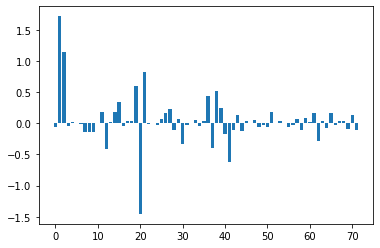

In [224]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X = df.drop('loan_status', axis=1)
y = df['loan_status']
# define the model
model = LogisticRegression(max_iter=1000)
# fit the model
model.fit(X_t, y)
# get importance
importance = model.coef_[0]
print(importance)
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [228]:
feature_score =pd.DataFrame(np.concatenate([importance.reshape(1,72)]),
             index = ["importance"],
             columns = list(X.columns)).T
feature_score.transpose()

,person_emp_length,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,installment,amnt_goods_price,delinq_2yrs,annual_rev,valeur,charge,...,Autres,Aval_Pétrolier,BTP,Banques,Commerce,Courtiers,Industrie,Libéral,Secteur_Public,Transport
importance,-0.053384,1.718019,1.14,-0.049984,0.019765,0.002192,-0.01175,-0.145131,-0.145131,-0.145131,...,-0.277311,0.031653,-0.079044,0.163356,-0.027504,0.040021,0.037725,-0.087519,0.136238,-0.101446


In [230]:
l_score =feature_score[importance >= 0.145131 ]
l_score

,importance
loan_int_rate,1.718019
loan_percent_income,1.140000
ratio_ep,0.180881
V1,0.182677
V2,0.348385
OTHER,0.593184
RENT,0.825748
Bonne,0.164133
Excellent,0.234818
DEBTCONSOLIDATION,0.440535


In [229]:
u_score = feature_score[importance <= -0.145131]
u_score

,importance
ep_inf_30,-0.415094
OWN,-1.454917
Très Mauvaise,-0.331170
EDUCATION,-0.402534
PERSONAL,-0.167429
VENTURE,-0.617181
Autres,-0.277311


Feature: 0, Score: 0.02851
Feature: 1, Score: 0.15133
Feature: 2, Score: 0.19211
Feature: 3, Score: 0.02065
Feature: 4, Score: 0.03185
Feature: 5, Score: 0.02805
Feature: 6, Score: 0.00668
Feature: 7, Score: 0.05644
Feature: 8, Score: 0.06011
Feature: 9, Score: 0.05796
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.02246
Feature: 12, Score: 0.02107
Feature: 13, Score: 0.00511
Feature: 14, Score: 0.02114
Feature: 15, Score: 0.01523
Feature: 16, Score: 0.01375
Feature: 17, Score: 0.01113
Feature: 18, Score: 0.02074
Feature: 19, Score: 0.00047
Feature: 20, Score: 0.01357
Feature: 21, Score: 0.03779
Feature: 22, Score: 0.00377
Feature: 23, Score: 0.00431
Feature: 24, Score: 0.00421
Feature: 25, Score: 0.00373
Feature: 26, Score: 0.00402
Feature: 27, Score: 0.00425
Feature: 28, Score: 0.00435
Feature: 29, Score: 0.00396
Feature: 30, Score: 0.00363
Feature: 31, Score: 0.00403
Feature: 32, Score: 0.00400
Feature: 33, Score: 0.00430
Feature: 34, Score: 0.00397
Feature: 35, Score: 0.00445
Fe

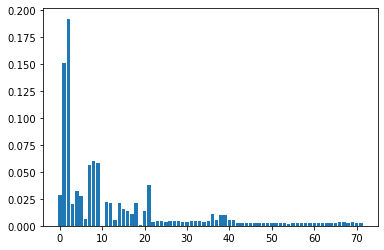

In [76]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
X = df.drop('loan_status', axis=1)
y = df['loan_status']
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance): 
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Random forest

In [134]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
X = df.drop('loan_status', axis=1)
y = df['loan_status']
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
importance

array([0.02962453, 0.14912643, 0.18568179, 0.01992406, 0.03243431,
       0.0288676 , 0.00707981, 0.06291624, 0.05827087, 0.05736482,
       0.        , 0.02277346, 0.02075416, 0.00512743, 0.02126132,
       0.01557171, 0.01440712, 0.01094099, 0.01742727, 0.00045496,
       0.01287966, 0.04076138, 0.00368913, 0.00460585, 0.00423365,
       0.00388292, 0.00403749, 0.00439378, 0.00442442, 0.00422756,
       0.00387578, 0.00426207, 0.00402696, 0.00449921, 0.00405613,
       0.00428348, 0.00995642, 0.00580616, 0.0109047 , 0.00951277,
       0.00484297, 0.00557505, 0.00233302, 0.00246089, 0.00233662,
       0.00257185, 0.00275899, 0.00253631, 0.00230359, 0.00242089,
       0.00256232, 0.0028076 , 0.00248599, 0.002261  , 0.00237341,
       0.00255787, 0.00230075, 0.00243058, 0.00245881, 0.00289459,
       0.00261978, 0.00298797, 0.00283544, 0.00319507, 0.0026836 ,
       0.00325716, 0.00323224, 0.00337909, 0.00317003, 0.00301426,
       0.00284894, 0.0031749 ])

In [135]:
importance.shape

(72,)

In [136]:
t = importance.reshape((1,72))

In [137]:
t.shape

(1, 72)

In [168]:
pd.DataFrame(np.concatenate([importance.reshape(1,72)]),
             index = ["importance"],
             columns = list(X.columns)).T

,importance
person_emp_length,0.029625
loan_int_rate,0.149126
loan_percent_income,0.185682
cb_person_cred_hist_length,0.019924
installment,0.032434
...,...
Courtiers,0.003379
Industrie,0.003170
Libéral,0.003014
Secteur_Public,0.002849


In [139]:
f_impotance = pd.DataFrame(t,
             index = ["importance"],
             columns = list(X.columns)).T

In [141]:
impotance = importance[importance >= 0.0125]
impotance

array([0.02962453, 0.14912643, 0.18568179, 0.01992406, 0.03243431,
       0.0288676 , 0.06291624, 0.05827087, 0.05736482, 0.02277346,
       0.02075416, 0.02126132, 0.01557171, 0.01440712, 0.01742727,
       0.01287966, 0.04076138])

In [176]:
impotance.reshape((1,17))

array([[0.02962453, 0.14912643, 0.18568179, 0.01992406, 0.03243431,
        0.0288676 , 0.06291624, 0.05827087, 0.05736482, 0.02277346,
        0.02075416, 0.02126132, 0.01557171, 0.01440712, 0.01742727,
        0.01287966, 0.04076138]])

In [186]:
f_impotance= f_impotance[f_impotance>= 0.0125]
f_impotance

<bound method DataFrame.drop of                             importance
person_emp_length                False
loan_int_rate                    False
loan_percent_income              False
cb_person_cred_hist_length       False
installment                      False
...                                ...
Courtiers                         True
Industrie                         True
Libéral                           True
Secteur_Public                    True
Transport                         True

[72 rows x 1 columns]>

In [195]:
imp =f_impotance.dropna()
imp

,importance
person_emp_length,0.029625
loan_int_rate,0.149126
loan_percent_income,0.185682
cb_person_cred_hist_length,0.019924
installment,0.032434
amnt_goods_price,0.028868
annual_rev,0.062916
valeur,0.058271
charge,0.057365
ratio_ep,0.022773


In [208]:
imp.transpose().columns

Index(['person_emp_length', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'installment', 'amnt_goods_price',
       'annual_rev', 'valeur', 'charge', 'ratio_ep', 'ep_inf_30', 'V1', 'V2',
       'V3', 'MORTGAGE', 'OWN', 'RENT'],
      dtype='object')

In [232]:
l_score.index

Index(['loan_int_rate', 'loan_percent_income', 'ratio_ep', 'V1', 'V2', 'OTHER',
       'RENT', 'Bonne', 'Excellent', 'DEBTCONSOLIDATION', 'HOMEIMPROVEMENT',
       'MEDICAL', '3', 'Assurances', 'Banques'],
      dtype='object')

In [234]:
u_score.index

Index(['ep_inf_30', 'OWN', 'Très Mauvaise', 'EDUCATION', 'PERSONAL', 'VENTURE',
       'Autres'],
      dtype='object')

In [236]:
# colonne se répetant dans # cas
columns = ['person_emp_length', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'installment', 'amnt_goods_price',
       'annual_rev', 'valeur', 'charge', 'ratio_ep', 'ep_inf_30', 'V1', 'V2',
       'V3', 'MORTGAGE', 'OWN', 'RENT',
       'RENT', 'Bonne', 'Excellent', 'DEBTCONSOLIDATION', 'HOMEIMPROVEMENT',
       'MEDICAL', '3', 'Assurances', 'Banques', 'Très Mauvaise', 'EDUCATION', 'PERSONAL', 'VENTURE',
       'Autres' ] 

In [238]:
len(columns)

31

In [121]:
df['ratio_ep']

0        0.10
1        0.40
2        0.75
3        0.40
4        0.55
         ... 
21559    0.30
21560    0.10
21561    0.70
21562    0.55
21563    0.85
Name: ratio_ep, Length: 21564, dtype: float64

In [124]:
len(df['ratio_ep'])

21564

In [181]:
for i in range(len(df['ratio_ep'])):
    df['ratio_ep'].iloc[i]>0.5

## Creation des matrices

### Matrice liquidité

In [127]:
def Matrice_liquiditer(data_frame, line):
    if data_frame['ratio_ep'].iloc[line]> 0.5:
        return 1
    elif data_frame['ratio_ep'].iloc[line]<= 0.5 and data_frame['ratio_ep'].iloc[line] > 0.3:
        return 2
    elif data_frame['ratio_ep'].iloc[line]<= 0.3 and data_frame['ratio_ep'].iloc[line] > 0.15:
        return 3
    elif data_frame['ratio_ep'].iloc[line]<= 0.15 and data_frame['ratio_ep'].iloc[line] >= 0.05:
        return 4
    else:
        return 5

In [142]:
liquidite = []
for i in range(len(df['ratio_ep'])):
    val = Matrice_liquiditer(df, i)
    liquidite.append(val)

In [ ]:
for i in range(len(table)):
    val = table[i]
    

In [144]:
pd.DataFrame(liquidite)

,0
0,4
1,2
2,1
3,2
4,1
...,...
21559,3
21560,4
21561,1
21562,1


### Matrice Maccro

In [205]:
# Matrice Maccro
def Mac(dataframe, line):
    if dataframe['person_emp_length'].iloc[line] <= 3 and dataframe['seteur_activité'].iloc[line] == 'Amont_Pétrolier':
        return 2
    elif dataframe['person_emp_length'].iloc[line] <= 3 and dataframe['seteur_activité'].iloc[line] == 'Aval_Pétrolier':
        return 3
    elif dataframe['person_emp_length'].iloc[line] <= 3 and dataframe['seteur_activité'].iloc[line] == 'Banques':
        return 2
    elif dataframe['person_emp_length'].iloc[line] <= 3 and dataframe['seteur_activité'].iloc[line] == 'Assurances':
        return 2
    elif dataframe['person_emp_length'].iloc[line] <= 3 and dataframe['seteur_activité'].iloc[line] == 'Courtiers':
        return 3
    elif dataframe['person_emp_length'].iloc[line] <= 3 and dataframe['seteur_activité'].iloc[line] == 'Industrie':
        return 3
    elif dataframe['person_emp_length'].iloc[line] <= 3 and dataframe['seteur_activité'].iloc[line] == 'Commerce':
        return 4
    elif dataframe['person_emp_length'].iloc[line] <= 3 and dataframe['seteur_activité'].iloc[line] == 'Transport':
        return 4
    elif dataframe['person_emp_length'].iloc[line] <= 3 and dataframe['seteur_activité'].iloc[line] == 'BTP':
        return 5
    elif dataframe['person_emp_length'].iloc[line] <= 3 and dataframe['seteur_activité'].iloc[line] == 'Libéral':
        return 5
    elif dataframe['person_emp_length'].iloc[line] <= 3 and dataframe['seteur_activité'].iloc[line] == 'Autres':
        return 5
    elif dataframe['person_emp_length'].iloc[line] <= 3 and dataframe['seteur_activité'].iloc[line] == 'Secteur_Public':
        return 2
    
    elif dataframe['person_emp_length'].iloc[line] > 3 and dataframe['person_emp_length'].iloc[line] < 6 and dataframe['seteur_activité'].iloc[line] == 'Amont_Pétrolier':
        return 1
    elif dataframe['person_emp_length'].iloc[line] > 3 and dataframe['person_emp_length'].iloc[line] < 6 and dataframe['seteur_activité'].iloc[line] == 'Aval_Pétrolier':
        return 2
    elif dataframe['person_emp_length'].iloc[line] > 3 and dataframe['person_emp_length'].iloc[line] < 6 and dataframe['seteur_activité'].iloc[line] == 'Banques':
        return 1
    elif dataframe['person_emp_length'].iloc[line] > 3 and dataframe['person_emp_length'].iloc[line] < 6 and dataframe['seteur_activité'].iloc[line] == 'Assurances':
        return 1
    elif dataframe['person_emp_length'].iloc[line] > 3 and dataframe['person_emp_length'].iloc[line] < 6 and dataframe['seteur_activité'].iloc[line] == 'Courtiers':
        return 2
    elif dataframe['person_emp_length'].iloc[line] > 3 and dataframe['person_emp_length'].iloc[line] < 6 and dataframe['seteur_activité'].iloc[line] == 'Industrie':
        return 2
    elif dataframe['person_emp_length'].iloc[line] > 3 and dataframe['person_emp_length'].iloc[line] < 6 and dataframe['seteur_activité'].iloc[line] == 'Commerce':
        return 3
    elif dataframe['person_emp_length'].iloc[line] > 3 and dataframe['person_emp_length'].iloc[line] < 6 and dataframe['seteur_activité'].iloc[line] == 'Transport':
        return 3
    elif dataframe['person_emp_length'].iloc[line] > 3 and dataframe['person_emp_length'].iloc[line] < 6 and dataframe['seteur_activité'].iloc[line] == 'BTP':
        return 4
    elif dataframe['person_emp_length'].iloc[line] > 3 and dataframe['person_emp_length'].iloc[line] < 6 and dataframe['seteur_activité'].iloc[line] == 'Libéral':
        return 4
    elif dataframe['person_emp_length'].iloc[line] > 3 and dataframe['person_emp_length'].iloc[line] < 6 and dataframe['seteur_activité'].iloc[line] == 'Autres':
        return 4
    elif dataframe['person_emp_length'].iloc[line] > 3 and dataframe['person_emp_length'].iloc[line] < 6 and dataframe['seteur_activité'].iloc[line] == 'Secteur_Public':
        return 1
    
    elif dataframe['person_emp_length'].iloc[line] >= 6 and dataframe['seteur_activité'].iloc[line] == 'Amont_Pétrolier':
        return 1
    elif dataframe['person_emp_length'].iloc[line] >= 6 and dataframe['seteur_activité'].iloc[line] == 'Aval_Pétrolier':
        return 1
    elif dataframe['person_emp_length'].iloc[line] >= 6 and dataframe['seteur_activité'].iloc[line] == 'Banques':
        return 1
    elif dataframe['person_emp_length'].iloc[line] >= 6 and dataframe['seteur_activité'].iloc[line] == 'Assurances':
        return 1
    elif dataframe['person_emp_length'].iloc[line] >= 6 and dataframe['seteur_activité'].iloc[line] == 'Courtiers':
        return 1
    elif dataframe['person_emp_length'].iloc[line] >= 6 and dataframe['seteur_activité'].iloc[line] == 'Industrie':
        return 1
    elif dataframe['person_emp_length'].iloc[line] >= 6 and dataframe['seteur_activité'].iloc[line] == 'Commerce':
        return 2
    elif dataframe['person_emp_length'].iloc[line] >= 6 and dataframe['seteur_activité'].iloc[line] == 'Transport':
        return 2
    elif dataframe['person_emp_length'].iloc[line] >= 6 and dataframe['seteur_activité'].iloc[line] == 'BTP':
        return 3
    elif dataframe['person_emp_length'].iloc[line] >= 6 and dataframe['seteur_activité'].iloc[line] == 'Libéral':
        return 3
    elif dataframe['person_emp_length'].iloc[line] >= 6 and dataframe['seteur_activité'].iloc[line] == 'Autres':
        return 4
    else :
        return 1

In [206]:
Maccro =[]
for i in range(len(df['seteur_activité'])):
    tal = Mac(df,i)
    Maccro.append(tal)

In [207]:
Maccro
 

[1,
 3,
 5,
 2,
 1,
 1,
 3,
 3,
 2,
 2,
 3,
 4,
 2,
 1,
 4,
 1,
 3,
 5,
 3,
 2,
 4,
 3,
 3,
 3,
 1,
 3,
 1,
 4,
 1,
 5,
 1,
 5,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 5,
 3,
 1,
 3,
 2,
 2,
 1,
 1,
 1,
 4,
 1,
 5,
 2,
 2,
 3,
 1,
 1,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 3,
 2,
 5,
 2,
 1,
 2,
 2,
 5,
 3,
 4,
 2,
 3,
 1,
 1,
 2,
 2,
 5,
 2,
 3,
 4,
 1,
 1,
 1,
 2,
 2,
 1,
 4,
 5,
 2,
 5,
 4,
 5,
 4,
 4,
 4,
 2,
 3,
 3,
 1,
 3,
 4,
 1,
 2,
 2,
 1,
 3,
 2,
 1,
 3,
 2,
 1,
 1,
 5,
 5,
 1,
 1,
 2,
 1,
 5,
 2,
 3,
 2,
 1,
 5,
 5,
 5,
 1,
 1,
 1,
 4,
 1,
 4,
 1,
 1,
 4,
 1,
 5,
 1,
 4,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 4,
 4,
 3,
 3,
 1,
 3,
 3,
 2,
 1,
 4,
 1,
 4,
 4,
 3,
 2,
 3,
 1,
 4,
 1,
 2,
 2,
 2,
 5,
 3,
 2,
 5,
 1,
 3,
 1,
 4,
 5,
 5,
 3,
 1,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 5,
 2,
 1,
 2,
 1,
 4,
 4,
 4,
 4,
 3,
 5,
 5,
 2,
 2,
 1,
 4,
 1,
 2,
 3,
 5,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 5,
 3,
 5,
 2,
 3,
 3,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 3,
 5,
 2,
 3,
 2,


In [ ]:
# type de contrat
def cont(dataframe, line):
    if dataframe['type_de_contrat'].iloc[line] > 2  and dataframe['seteur_activité'].iloc[line] == 'Amont_Pétrolier':
        return 1
    elif dataframe['type_de_contrat'].iloc[line] > 2 and dataframe['seteur_activité'].iloc[line] == 'Aval_Pétrolier':
        return 2
    elif dataframe['type_de_contrat'].iloc[line] > 2 and dataframe['seteur_activité'].iloc[line] == 'Banques':
        return 1
    elif dataframe['type_de_contrat'].iloc[line] > 2 and dataframe['seteur_activité'].iloc[line] == 'Assurances':
        return 1
    elif dataframe['type_de_contrat'].iloc[line] > 2 and dataframe['seteur_activité'].iloc[line] == 'Courtiers':
        return 2
    elif dataframe['type_de_contrat'].iloc[line] > 2 and dataframe['seteur_activité'].iloc[line] == 'Industrie':
        return 2
    elif dataframe['type_de_contrat'].iloc[line] > 2 and dataframe['seteur_activité'].iloc[line] == 'Commerce':
        return 2
    elif dataframe['type_de_contrat'].iloc[line] > 2 and dataframe['seteur_activité'].iloc[line] == 'Transport':
        return 2
    elif dataframe['type_de_contrat'].iloc[line] > 2 and dataframe['seteur_activité'].iloc[line] == 'BTP':
        return 2
    elif dataframe['type_de_contrat'].iloc[line] > 2 and dataframe['seteur_activité'].iloc[line] == 'Libéral':
        return 2
    elif dataframe['type_de_contrat'].iloc[line] > 2 and dataframe['seteur_activité'].iloc[line] == 'Autres':
        return 2
    elif dataframe['type_de_contrat'].iloc[line] > 2 and dataframe['seteur_activité'].iloc[line] == 'Secteur_Public':
        return 2
    
    elif dataframe['type_de_contrat'].iloc[line] <= 12 and dataframe['seteur_activité'].iloc[line] == 'Amont_Pétrolier':
        return 4
    elif dataframe['type_de_contrat'].iloc[line] <= 12 and dataframe['seteur_activité'].iloc[line] == 'Aval_Pétrolier':
        return 4
    elif dataframe['type_de_contrat'].iloc[line] <= 12 and dataframe['seteur_activité'].iloc[line] == 'Banques':
        return 4
    elif dataframe['type_de_contrat'].iloc[line] <= 12 and dataframe['seteur_activité'].iloc[line] == 'Assurances':
        return 4
    elif dataframe['type_de_contrat'].iloc[line] <= 12 and dataframe['seteur_activité'].iloc[line] == 'Courtiers':
        return 5
    elif dataframe['type_de_contrat'].iloc[line] <= 12 and dataframe['seteur_activité'].iloc[line] == 'Industrie':
        return 5
    elif dataframe['type_de_contrat'].iloc[line] <= 12 and dataframe['seteur_activité'].iloc[line] == 'Commerce':
        return 5
    elif dataframe['type_de_contrat'].iloc[line] <= 12 and dataframe['seteur_activité'].iloc[line] == 'Transport':
        return 5
    elif dataframe['type_de_contrat'].iloc[line] <= 12 and dataframe['seteur_activité'].iloc[line] == 'BTP':
        return 5
    elif dataframe['type_de_contrat'].iloc[line] <= 12 and dataframe['seteur_activité'].iloc[line] == 'Libéral':
        return 5
    elif dataframe['type_de_contrat'].iloc[line] <= 12 and dataframe['seteur_activité'].iloc[line] == 'Autres':
        return 5
    elif dataframe['type_de_contrat'].iloc[line] <= 12 and dataframe['seteur_activité'].iloc[line] == 'Secteur_Public':
        return 5
    
    elif dataframe['type_de_contrat'].iloc[line] > 12 and dataframe['seteur_activité'].iloc[line] == 'Amont_Pétrolier':
        return 3
    elif dataframe['type_de_contrat'].iloc[line] > 12 and dataframe['seteur_activité'].iloc[line] == 'Aval_Pétrolier':
        return 3
    elif dataframe['type_de_contrat'].iloc[line] > 12 and dataframe['seteur_activité'].iloc[line] == 'Banques':
        return 3
    elif dataframe['type_de_contrat'].iloc[line] > 12 and dataframe['seteur_activité'].iloc[line] == 'Assurances':
        return 3
    elif dataframe['type_de_contrat'].iloc[line] > 12 and dataframe['seteur_activité'].iloc[line] == 'Courtiers':
        return 4
    elif dataframe['type_de_contrat'].iloc[line] > 12 and dataframe['seteur_activité'].iloc[line] == 'Industrie':
        return 4
    elif dataframe['type_de_contrat'].iloc[line] > 12 and dataframe['seteur_activité'].iloc[line] == 'Commerce':
        return 4
    elif dataframe['type_de_contrat'].iloc[line] > 12 and dataframe['seteur_activité'].iloc[line] == 'Transport':
        return 4
    elif dataframe['type_de_contrat'].iloc[line] > 12 and dataframe['seteur_activité'].iloc[line] == 'BTP':
        return 4
    elif dataframe['type_de_contrat'].iloc[line] > 12 and dataframe['seteur_activité'].iloc[line] == 'Libéral':
        return 4
    elif dataframe['type_de_contrat'].iloc[line] > 12 and dataframe['seteur_activité'].iloc[line] == 'Autres':
        return 4
    elif dataframe['type_de_contrat'].iloc[line] > 12 and dataframe['seteur_activité'].iloc[line] == 'Secteur_Public':
        return 4
    
    elif dataframe['type_de_contrat'].iloc[line] == 'Fonctionnaire' and dataframe['seteur_activité'].iloc[line] == 'Secteur_Public':
        return 1
    

    
    elif dataframe['type_de_contrat'].iloc[line] == 'Autres' and dataframe['seteur_activité'].iloc[line] == 'Amont_Pétrolier':
        return 5
    elif dataframe['type_de_contrat'].iloc[line] == 'Autres' and dataframe['seteur_activité'].iloc[line] == 'Aval_Pétrolier':
        return 5
    elif dataframe['type_de_contrat'].iloc[line] == 'Autres' and dataframe['seteur_activité'].iloc[line] == 'Banques':
        return 5
    elif dataframe['type_de_contrat'].iloc[line] == 'Autres' and dataframe['seteur_activité'].iloc[line] == 'Assurances':
        return 5
    elif dataframe['type_de_contrat'].iloc[line] == 'Autres' and dataframe['seteur_activité'].iloc[line] == 'Courtiers':
        return 5
    elif dataframe['type_de_contrat'].iloc[line] == 'Autres' and dataframe['seteur_activité'].iloc[line] == 'Industrie':
        return 5
    elif dataframe['type_de_contrat'].iloc[line] == 'Autres' and dataframe['seteur_activité'].iloc[line] == 'Commerce':
        return 5
    elif dataframe['type_de_contrat'].iloc[line] == 'Autres' and dataframe['seteur_activité'].iloc[line] == 'Transport':
        return 5
    elif dataframe['type_de_contrat'].iloc[line] == 'Autres' and dataframe['seteur_activité'].iloc[line] == 'BTP':
        return 5
    elif dataframe['type_de_contrat'].iloc[line] == 'Autres' and dataframe['seteur_activité'].iloc[line] == 'Libéral':
        return 5
    elif dataframe['type_de_contrat'].iloc[line] == 'Autres' and dataframe['seteur_activité'].iloc[line] == 'Autres':
        return 5
    else :
        return 5

In [215]:
Contrat =[]
for i in range(len(df['seteur_activité'])):
    tal = Mac(df,i)
    Contrat.append(tal)

In [216]:
Contrat

[1,
 3,
 5,
 2,
 1,
 1,
 3,
 3,
 2,
 2,
 3,
 4,
 2,
 1,
 4,
 1,
 3,
 5,
 3,
 2,
 4,
 3,
 3,
 3,
 1,
 3,
 1,
 4,
 1,
 5,
 1,
 5,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 5,
 3,
 1,
 3,
 2,
 2,
 1,
 1,
 1,
 4,
 1,
 5,
 2,
 2,
 3,
 1,
 1,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 3,
 2,
 5,
 2,
 1,
 2,
 2,
 5,
 3,
 4,
 2,
 3,
 1,
 1,
 2,
 2,
 5,
 2,
 3,
 4,
 1,
 1,
 1,
 2,
 2,
 1,
 4,
 5,
 2,
 5,
 4,
 5,
 4,
 4,
 4,
 2,
 3,
 3,
 1,
 3,
 4,
 1,
 2,
 2,
 1,
 3,
 2,
 1,
 3,
 2,
 1,
 1,
 5,
 5,
 1,
 1,
 2,
 1,
 5,
 2,
 3,
 2,
 1,
 5,
 5,
 5,
 1,
 1,
 1,
 4,
 1,
 4,
 1,
 1,
 4,
 1,
 5,
 1,
 4,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 4,
 4,
 3,
 3,
 1,
 3,
 3,
 2,
 1,
 4,
 1,
 4,
 4,
 3,
 2,
 3,
 1,
 4,
 1,
 2,
 2,
 2,
 5,
 3,
 2,
 5,
 1,
 3,
 1,
 4,
 5,
 5,
 3,
 1,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 5,
 2,
 1,
 2,
 1,
 4,
 4,
 4,
 4,
 3,
 5,
 5,
 2,
 2,
 1,
 4,
 1,
 2,
 3,
 5,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 5,
 3,
 5,
 2,
 3,
 3,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 3,
 5,
 2,
 3,
 2,


### Matrice gestion

In [218]:
def gestion(data_frame, line):
    if data_frame['ep_inf_30'].iloc[line] == 0:
        return 1
    elif data_frame['ep_inf_30'].iloc[line] > 0 and data_frame['ep_inf_30'].iloc[line] < 3:
        return 2
    elif data_frame['ep_inf_30'].iloc[line] >= 3 and data_frame['ep_inf_30'].iloc[line] < 6:
        return 3
    elif data_frame['ep_inf_30'].iloc[line] >= 6 and data_frame['ep_inf_30'].iloc[line] < 9:
        return 4
    else:
        return 5

In [219]:
Gestion = []
for i in range(len(df)):
    ral = gestion(df, i)
    Gestion.append(ral)

In [220]:
Gestion

[3,
 3,
 5,
 5,
 3,
 5,
 5,
 5,
 5,
 5,
 2,
 5,
 3,
 5,
 5,
 3,
 5,
 4,
 4,
 2,
 5,
 4,
 1,
 4,
 4,
 5,
 3,
 3,
 5,
 3,
 5,
 5,
 4,
 3,
 4,
 3,
 5,
 5,
 5,
 3,
 3,
 5,
 4,
 5,
 5,
 4,
 2,
 2,
 2,
 4,
 5,
 5,
 1,
 3,
 3,
 2,
 4,
 5,
 3,
 3,
 4,
 5,
 5,
 3,
 5,
 2,
 2,
 5,
 5,
 5,
 2,
 5,
 5,
 3,
 5,
 5,
 1,
 4,
 3,
 3,
 5,
 2,
 5,
 5,
 4,
 4,
 4,
 2,
 5,
 5,
 5,
 2,
 2,
 5,
 5,
 5,
 5,
 3,
 2,
 5,
 5,
 4,
 4,
 5,
 5,
 5,
 2,
 5,
 5,
 5,
 5,
 5,
 3,
 3,
 5,
 2,
 3,
 5,
 2,
 5,
 5,
 5,
 5,
 4,
 5,
 4,
 4,
 5,
 5,
 3,
 4,
 3,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 3,
 5,
 2,
 3,
 1,
 5,
 2,
 3,
 3,
 4,
 5,
 3,
 3,
 3,
 4,
 5,
 5,
 3,
 5,
 3,
 5,
 2,
 5,
 5,
 2,
 5,
 5,
 3,
 2,
 5,
 4,
 2,
 5,
 1,
 4,
 5,
 3,
 5,
 4,
 5,
 5,
 5,
 5,
 3,
 5,
 5,
 3,
 2,
 5,
 3,
 5,
 5,
 5,
 5,
 5,
 3,
 2,
 5,
 2,
 4,
 4,
 4,
 5,
 4,
 5,
 2,
 5,
 2,
 3,
 5,
 2,
 4,
 3,
 5,
 1,
 5,
 5,
 5,
 5,
 4,
 3,
 5,
 5,
 2,
 3,
 5,
 4,
 5,
 2,
 1,
 5,
 5,
 4,
 4,
 5,
 5,
 3,
 5,
 3,
 3,
 5,
 2,
 1,
 3,
 3,
 5,
 3,
 2,
 4,
 5,


### Matrice Stabilité de revenus

In [270]:
def stab(dataframe, line):
    if dataframe['annual_rev'].iloc[line] < 1.8 and dafaframe['evol_rev'].iloc[line] == 'Excellent':
        return 1
    elif dataframe['annual_rev'].iloc[line] < 1.8 and dafaframe['evol_rev'].iloc[line] == 'Bonne':
        return 2
    elif dataframe['annual_rev'].iloc[line] < 1.8 and dafaframe['evol_rev'].iloc[line] == 'Passable':
        return 3
    elif dataframe['annual_rev'].iloc[line] < 1.8 and dafaframe['evol_rev'].iloc[line] == 'Mauvaise':
        return 4
    elif dataframe['annual_rev'].iloc[line] < 1.8 and dafaframe['evol_rev'].iloc[line] == 'Très Mauvaise':
        return 5
    
    elif dataframe['annual_rev'].iloc[line] >= 1.8 and dataframe['annual_rev'].iloc[line] < 6 and dataframe['evol_rev'].iloc[line] == 'Excellent':
        return 1
    elif dataframe['annual_rev'].iloc[line] >= 1.8 and dataframe['annual_rev'].iloc[line] < 6 and dataframe['evol_rev'].iloc[line] == 'Bonne':
        return 2
    elif dataframe['annual_rev'].iloc[line] >= 1.8 and dataframe['annual_rev'].iloc[line] < 6 and dataframe['evol_rev'].iloc[line] == 'Passable':
        return 3
    elif dataframe['annual_rev'].iloc[line] >= 1.8 and dataframe['annual_rev'].iloc[line] < 6 and dataframe['evol_rev'].iloc[line] == 'Mauvaise':
        return 4
    elif dataframe['annual_rev'].iloc[line] >= 1.8 and dataframe['annual_rev'].iloc[line] < 6 and dataframe['evol_rev'].iloc[line] == 'Très Mauvaise':
        return 5
    
    elif dataframe['annual_rev'].iloc[line] >= 6 and dataframe['annual_rev'].iloc[line] < 9 and dataframe['evol_rev'].iloc[line] == 'Excellent':
        return 1
    elif dataframe['annual_rev'].iloc[line] >= 6 and dataframe['annual_rev'].iloc[line] < 9 and dataframe['evol_rev'].iloc[line] == 'Bonne':
        return 2
    elif dataframe['annual_rev'].iloc[line] >= 6 and dataframe['annual_rev'].iloc[line] < 9 and dataframe['evol_rev'].iloc[line] == 'Passable':
        return 3
    elif dataframe['annual_rev'].iloc[line] >= 6 and dataframe['annual_rev'].iloc[line] < 9 and dataframe['evol_rev'].iloc[line] == 'Mauvaise':
        return 4
    elif dataframe['annual_rev'].iloc[line] >= 6 and dataframe['annual_rev'].iloc[line] < 9 and dataframe['evol_rev'].iloc[line] == 'Très Mauvaise':
        return 5
    
    elif dataframe['annual_rev'].iloc[line] >= 9 and dataframe['annual_rev'].iloc[line] < 12 and dataframe['evol_rev'].iloc[line] == 'Excellent':
        return 1
    elif dataframe['annual_rev'].iloc[line] >= 9 and dataframe['annual_rev'].iloc[line] < 12 and dataframe['evol_rev'].iloc[line] == 'Bonne':
        return 2
    elif dataframe['annual_rev'].iloc[line] >= 9 and dataframe['annual_rev'].iloc[line] < 12 and dataframe['evol_rev'].iloc[line] == 'Passable':
        return 2
    elif dataframe['annual_rev'].iloc[line] >= 9 and dataframe['annual_rev'].iloc[line] < 12 and dataframe['evol_rev'].iloc[line] == 'Mauvaise':
        return 3
    elif dataframe['annual_rev'].iloc[line] >= 9 and dataframe['annual_rev'].iloc[line] < 12 and dataframe['evol_rev'].iloc[line] == 'Très Mauvaise':
        return 4
    
    elif dataframe['annual_rev'].iloc[line] >= 12 and dataframe['evol_rev'].iloc[line] == 'Excellent':
        return 1
    elif dataframe['annual_rev'].iloc[line] >= 12 and dataframe['evol_rev'].iloc[line] == 'Bonne':
        return 1
    elif dataframe['annual_rev'].iloc[line] >= 12 and dataframe['evol_rev'].iloc[line] == 'Passable':
        return 2
    elif dataframe['annual_rev'].iloc[line] >= 12 and dataframe['evol_rev'].iloc[line] == 'Mauvaise':
        return 3
    else :
        return 4
    

In [295]:
Stabilité = []
for i in range(len(df)):
    al = stab(df,i)
    Stabilité.append(al)

In [296]:
col = ['stabilité']

In [297]:
Stabilité = pd.DataFrame(Stabilité, columns = col)

In [298]:
Stabilité

,stabilité
0,4
1,1
2,5
3,2
4,3
...,...
21559,1
21560,1
21561,3
21562,3


In [301]:
Stabilité.iloc[for i in range(len(df)):
              ] == '2'

SyntaxError: invalid syntax (<ipython-input-301-3640c883a749>, line 1)

###  Matrice besoin

In [ ]:
def besoin(dataframe, line):
    if dataframe['n'].iloc[line] < 1 and dafaframe['valeur1'].iloc[line] == 'Excellent':
        return 1
    elif dataframe['n'].iloc[line] < 1 and dafaframe['valeur1'].iloc[line] == 'Bonne':
        return 1
    elif dataframe['n'].iloc[line] < 1 and dafaframe['valeur1'].iloc[line] == 'Passable':
        return 2
    elif dataframe['n'].iloc[line] < 1 and dafaframe['valeur1'].iloc[line] == 'Mauvaise':
        return 3
    elif dataframe['n'].iloc[line] < 1 and dafaframe['valeur1'].iloc[line] == 'Très Mauvaise':
        return 3
    
    elif dataframe['n'].iloc[line] >= 1 and Stabilité.iloc[for i in range(len(df))] == '2' and dataframe['valeur1'].iloc[line] == 'Excellent':
        return 1
    elif dataframe['n'].iloc[line] >= 1 and Stabilité.iloc[0] == '2' and dataframe['valeur1'].iloc[line] == 'Bonne':
        return 2
    elif dataframe['n'].iloc[line] >= 1 and Stabilité.iloc[0] == '2' and dataframe['valeur1'].iloc[line] == 'Passable':
        return 3
    elif dataframe['n'].iloc[line] >= 1 and Stabilité.iloc[0] == '2' and dataframe['valeur1'].iloc[line] == 'Mauvaise':
        return 4
    elif dataframe['n'].iloc[line] >= 1 and Stabilité.iloc[0] == '2' and dataframe['valeur1'].iloc[line] == 'Très Mauvaise':
        return 5
    
    elif dataframe['n'].iloc[line] >= 1 and Stabilité.iloc[0] == '3' and dataframe['valeur1'].iloc[line] == 'Excellent':
        return 2
    elif dataframe['n'].iloc[line] >= 1 and Stabilité.iloc[0] == '3' and dataframe['valeur1'].iloc[line] == 'Bonne':
        return 3
    elif dataframe['n'].iloc[line] >= 1 and Stabilité.iloc[0] == '3' and dataframe['valeur1'].iloc[line] == 'Passable':
        return 4
    elif dataframe['n'].iloc[line] >= 1 and Stabilité.iloc[0] == '3' and dataframe['valeur1'].iloc[line] == 'Mauvaise':
        return 5
    elif dataframe['n'].iloc[line] >= 1 and Stabilité.iloc[0] == '3' and dataframe['valeur1'].iloc[line] == 'Très Mauvaise':
        return 5
    
    elif dataframe['n'].iloc[line] >= 1 and Stabilité.iloc[0] == '4' and dataframe['valeur1'].iloc[line] == 'Excellent':
        return 3
    elif dataframe['n'].iloc[line] >= 1 and Stabilité.iloc[0] == '4' and dataframe['valeur1'].iloc[line] == 'Bonne':
        return 4
    elif dataframe['n'].iloc[line] >= 1 and Stabilité.iloc[0] == '4' and dataframe['valeur1'].iloc[line] == 'Passable':
        return 5
    elif dataframe['n'].iloc[line] >= 1 and Stabilité.iloc[0] == '4' and dataframe['valeur1'].iloc[line] == 'Mauvaise':
        return 5
    elif dataframe['n'].iloc[line] >= 1 and Stabilité.iloc[0] == '4' and dataframe['valeur1'].iloc[line] == 'Très Mauvaise':
        return 5
    
    elif dataframe['n'].iloc[line] >= 1 and Stabilité.iloc[0] == '5' and dataframe['valeur1'].iloc[line] == 'Excellent':
        return 4
    elif dataframe['n'].iloc[line] >= 1 and Stabilité.iloc[0] == '5' and dataframe['valeur1'].iloc[line] == 'Bonne':
        return 5
    elif dataframe['n'].iloc[line] >= 1 and Stabilité.iloc[0] == '5' and dataframe['valeur1'].iloc[line] == 'Passable':
        return 5
    elif dataframe['n'].iloc[line] >= 1 and Stabilité.iloc[0] == '5' and dataframe['valeur1'].iloc[line] == 'Mauvaise':
        return 5
    else :
        return 5
    

In [249]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'term',
       'installment', 'amnt_goods_price', 'emp_title', 'delinq_2yrs',
       'seteur_activité', 'annual_rev', 'valeur', 'charge', 'ratio',
       'ratio_ep', 'type_de_contrat', 'ep_inf_30', 'evol_rev', 'n', 'valeur1',
       'b', 'V1', 'V2', 'V3', 'V4'],
      dtype='object')

###  Matrice garantie

In [281]:
def garant(line):
    if df['b'].iloc[line] == "Excellent" and df['valeur1'].iloc[line] == 'Excellent':
        return 1
    elif df['b'].iloc[line] == "Excellent" and df['valeur1'].iloc[line] == 'Bonne':
        return 2
    elif df['b'].iloc[line] == "Excellent" and df['valeur1'].iloc[line] == 'Passable':
        return 3
    elif df['b'].iloc[line] == "Excellent" and df['valeur1'].iloc[line] == 'Mauvaise':
        return 4
    elif df['b'].iloc[line] == "Excellent" and df['valeur1'].iloc[line] == 'Très Mauvaise':
        return 5
    
    elif df['b'].iloc[line] == "Bonne" and df['valeur1'].iloc[line] == 'Excellent':
        return 2
    elif df['b'].iloc[line] == "Bonne" and df['valeur1'].iloc[line] == 'Bonne':
        return 3
    elif df['b'].iloc[line] == "Bonne" and df['valeur1'].iloc[line] == 'Passable':
        return 4
    elif df['b'].iloc[line] == "Bonne" and df['valeur1'].iloc[line] == 'Mauvaise':
        return 5
    elif df['b'].iloc[line] == "Bonne" and df['valeur1'].iloc[line] == 'Très Mauvaise':
        return 5
    
    elif df['b'].iloc[line] == "Passable" and df['valeur1'].iloc[line] == 'Excellent':
        return 3
    elif df['b'].iloc[line] == "Passable" and df['valeur1'].iloc[line] == 'Bonne':
        return 4
    elif df['b'].iloc[line] == "Passable" and df['valeur1'].iloc[line] == 'Passable':
        return 5
    elif df['b'].iloc[line] == "Passable" and df['valeur1'].iloc[line] == 'Mauvaise':
        return 5
    elif df['b'].iloc[line] == "Passable" and df['valeur1'].iloc[line] == 'Très Mauvaise':
        return 5
    
    elif df['b'].iloc[line] == "Mauvaise" and df['valeur1'].iloc[line] == 'Excellent':
        return 4
    elif df['b'].iloc[line] == "Mauvaise" and df['valeur1'].iloc[line] == 'Bonne':
        return 5
    elif df['b'].iloc[line] == "Mauvaise" and df['valeur1'].iloc[line] == 'Passable':
        return 5
    elif df['b'].iloc[line] == "Mauvaise" and df['valeur1'].iloc[line] == 'Mauvaise':
        return 5
    elif df['b'].iloc[line] == "Mauvaise" and df['valeur1'].iloc[line] == 'Très Mauvaise':
        return 5
    
    elif df['b'].iloc[line] == "Très Mauvaise" and df['valeur1'].iloc[line] == 'Excellent':
        return 4
    elif df['b'].iloc[line] == "Très Mauvaise" and df['valeur1'].iloc[line] == 'Bonne':
        return 5
    elif df['b'].iloc[line] == "Très Mauvaise" and df['valeur1'].iloc[line] == 'Passable':
        return 5
    elif df['b'].iloc[line] == "Très Mauvaise" and df['valeur1'].iloc[line] == 'Mauvaise':
        return 5
    else :
        return 5

In [282]:
Garantie =[]
for i in range(len(df)):
    lal = garant(i)
    Garantie.append(lal)

In [283]:
Garantie

[4,
 4,
 5,
 4,
 3,
 5,
 5,
 5,
 5,
 4,
 4,
 2,
 4,
 5,
 3,
 5,
 5,
 5,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 4,
 2,
 3,
 5,
 4,
 2,
 5,
 5,
 3,
 5,
 4,
 5,
 5,
 5,
 1,
 3,
 5,
 5,
 5,
 4,
 5,
 2,
 5,
 5,
 5,
 4,
 1,
 1,
 5,
 5,
 5,
 5,
 5,
 1,
 5,
 4,
 5,
 5,
 4,
 4,
 5,
 5,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 4,
 5,
 3,
 5,
 5,
 5,
 5,
 1,
 2,
 4,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 5,
 2,
 4,
 5,
 2,
 5,
 5,
 4,
 5,
 4,
 1,
 1,
 1,
 5,
 3,
 5,
 5,
 3,
 5,
 4,
 5,
 5,
 5,
 4,
 4,
 3,
 2,
 5,
 2,
 1,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 1,
 4,
 5,
 2,
 3,
 4,
 1,
 1,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 2,
 5,
 5,
 4,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 3,
 5,
 5,
 3,
 5,
 4,
 5,
 5,
 4,
 5,
 5,
 5,
 4,
 5,
 5,
 4,
 4,
 4,
 5,
 5,
 4,
 5,
 5,
 4,
 4,
 5,
 3,
 5,
 2,
 5,
 5,
 4,
 4,
 3,
 5,
 5,
 3,
 5,
 4,
 4,
 4,
 3,
 4,
 5,
 4,
 5,
 5,
 5,
 4,
 4,
 5,
 5,
 5,
 5,
 3,
 5,
 5,
 2,
 2,
 5,
 3,
